<a href="https://colab.research.google.com/github/harshitgoyal97/chicago-crime-detection/blob/master/Observations_Chicago_Crime_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Helpful Material:**

1) https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

2) Helpful function: df.value_counts()

**Learning objective**
*  EDA
*  Getting familiar with datetime operations


In [1]:
# Loading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [37]:
#load data
chicago_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Chicago_Crime_Detective.csv")

In [38]:
 chicago_data.head()

,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012


Use the raw data github link above.

Data Columns details:
1. ID: a unique identifier for each observation.

2. Date: the date the crime occurred.
LocationDescription: the location where the crime occurred.

3. Arrest: whether or not an arrest was made for the crime (TRUE if an arrest was made, and FALSE if an arrest was not made).

4. Domestic: whether or not the crime was a domestic crime, meaning that it was committed against a family member (TRUE if it was domestic, and FALSE if it was not domestic).

5. Beat: the area, or "beat" in which the crime occurred. This is the smallest regional division defined by the Chicago police department.

6. District: the police district in which the crime occured. Each district is composed of many beats, and are defined by the Chicago Police Department.

7. CommunityArea: the community area in which the crime occurred. Since the 1920s, Chicago has been divided into what are called "community areas", of which there are now 77. The community areas were devised in an attempt to create socially homogeneous regions.

8. Year: the year in which the crime occurred.
Latitude: the latitude of the location at which the crime occurred.

**Question 1:** What is the Month and Year of the median date in our dataset? *


In [40]:
# parsing date from string to datetime
import dateutil
chicago_data['Date'] = chicago_data['Date'].apply(dateutil.parser.parse, dayfirst = False)

In [45]:
chicago_data['Date']

0        2012-12-31 23:15:00
1        2012-12-31 22:00:00
2        2012-12-31 22:00:00
3        2012-12-31 22:00:00
4        2012-12-31 21:30:00
                 ...        
191636   2001-01-01 00:05:00
191637   2001-01-01 00:01:00
191638   2001-01-01 00:01:00
191639   2001-01-01 00:01:00
191640   2001-01-01 00:01:00
Name: Date, Length: 191641, dtype: datetime64[ns]

In [ ]:
# Sorting data by date and extracting date column from the dataset
dates = chicago_data.sort_values(by=['Date'])['Date'] 

# Calculating median by getting the middle value
median_date = dates[len(dates)//2]
median_date

Timestamp('2006-05-21 12:30:00')

In [ ]:
median_date.month_name() + " "+ str(median_date.year)

'May 2006'

**Question 2:** In which month did the lowest motor vehicle thefts occur? *


In [48]:
from collections import Counter
# Calculating month name from each date
monthNames = [i.month_name() for i in chicago_data['Date']]
# using Counter subclass for counting the no. of occurrences of a particular month (Hence, indicating the no. of crimes in that month)
dictMonths = Counter(monthNames)
dictMonths

Counter({'April': 15280,
         'August': 16572,
         'December': 16426,
         'February': 13511,
         'January': 16047,
         'July': 16801,
         'June': 16002,
         'March': 15758,
         'May': 16035,
         'November': 16063,
         'October': 17086,
         'September': 16060})

In [49]:
# For lowest motor vehicle thefts, we will get the key(month) corresponding to the min value of the dictMonths dictionary
min(dictMonths, key=dictMonths.get)

'February'

**Question 3:** In which month did the highest motor vehicle thefts occur? *


In [ ]:
# Similarly, for highest motor vehicle thefts, we will use max
max(dictMonths, key=dictMonths.get)

'October'

**Question 4:** On which day of the week did most motor vehicle thefts occur? 
1. Monday
2. Wednesday
3. Friday 
4. Sunday


In [50]:
from collections import Counter
# Calculating day of the week for each date
daysOfWeek = [i.day_name() for i in chicago_data['Date']]
# using Counter subclass for counting the no. of occurrences of a particular day (Hence, indicating the no. of crimes on that day)
dictDays = Counter(daysOfWeek)
dictDays

Counter({'Friday': 29284,
         'Monday': 27397,
         'Saturday': 27118,
         'Sunday': 26316,
         'Thursday': 27319,
         'Tuesday': 26791,
         'Wednesday': 27416})

In [51]:
# Similar to months, for highest motor vehicle thefts, we will use max
max(dictDays, key=dictDays.get)

'Friday'

**Question 5:** Each observation in the dataset represents a motor vehicle theft, and the Arrest variable indicates whether an arrest was later made for this theft. Which month has the largest number of motor vehicle thefts for which an arrest was made? 

In [52]:
# Calculating the number of times an arrest was made later
chicago_data['Arrest'].value_counts()

False    176105
True      15536
Name: Arrest, dtype: int64

In [53]:
updated_data = chicago_data['Date'][chicago_data['Arrest'] == True]

In [54]:
# Calculating month name from each date
monthNames = [i.month_name() for i in updated_data]
# using Counter subclass for counting the no. of occurrences of a particular month (Hence, indicating the no. of crimes in that month)
dictMonths = Counter(monthNames)
dictMonths

Counter({'April': 1252,
         'August': 1329,
         'December': 1397,
         'February': 1238,
         'January': 1435,
         'July': 1324,
         'June': 1230,
         'March': 1298,
         'May': 1187,
         'November': 1256,
         'October': 1342,
         'September': 1248})

In [55]:
# using max function for calculating month with highest no. of motor vehicle thefts when an arrest was made later
max(dictMonths, key=dictMonths.get)

'January'

**Question 6:** Select the incorrect statement 
1. It look like crime decreases from 2002 - 2012
2. It look like crime increases from 2005 - 2008
3. It look like crime increases from 2009 - 2011


In [28]:
# selecting the year dataset
year_data = chicago_data['Year']

Text(0.5, 1.0, 'Frequency distribution')

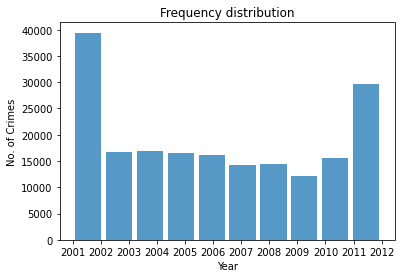

In [29]:
# Plotting a Histogram (Frequency Distribution)
plt.hist(year_data, alpha = 0.75, rwidth=0.85)
plt.ylabel("No. of Crimes")
plt.xlabel("Year")
plt.xticks(np.arange(2001, 2013))
plt.title("Frequency distribution")


**Answer 6:** *Based on the plot, Option 2 is the answer*





**Question 7:** Crimes for which more arrests were made are in the first half of the time period or the second half of the time period? *
(Note that the time period is from 2001 to 2012, so the middle of the time period is the beginning of 2007.)

1. First half
2. Second half


**Answer 7:** *First half --> Based on the plot*





**Question 8:** For what proportion of motor vehicle thefts in 2001 was an arrest made?


In [77]:
# Total no. of motor vehicle thefts in 2001
total = year_data[year_data == 2001].count()
total

20669

In [79]:
# Total no. of thefts in 2001 where arrest was made
condition = chicago_data[chicago_data['Arrest'] == True][year_data == 2001]['Year'].count()
condition

2152

In [80]:
proportion = condition/total
proportion

0.10411727708161982

**Answer 8:** 0.10

**Question 9:** Create a subset of your data, only taking observations for which the theft happened in one of the top five locations for motor vehicle thefts, excluding the "Other" category. Call this new data set "Top5". How many observations are in Top5?

In [11]:
# Calculating Top 6 locations
chicago_data['LocationDescription'].value_counts().head(6)

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

In [15]:
# No. of observations in Top 6 theft locations
Top6 = chicago_data['LocationDescription'].value_counts().head(6).sum()
Top6

182083

In [14]:
# No. of observations in 'other' location
other = (chicago_data['LocationDescription'] == 'OTHER').sum()
other

4573

In [35]:
# No. of Top 5 observations excluding 'other'
Top5 = Top6 - other
Top5

177510

**Answer 9:** 177510

**Question 10:** On which day of the week do the most motor vehicle thefts at gas stations happen? *

In [30]:
# Calculating dates when thefts happened at gas station
date_gas_station = chicago_data['Date'][chicago_data['LocationDescription'] == 'GAS STATION']
date_gas_station

13       2012-12-31 16:20:00
106      2012-12-29 10:00:00
213      2012-12-27 10:00:00
278      2012-12-25 10:00:00
290      2012-12-24 21:55:00
                 ...        
191335   2001-01-06 16:00:00
191350   2001-01-06 11:30:00
191376   2001-01-05 22:00:00
191562   2001-01-02 18:10:00
191583   2001-01-02 08:35:00
Name: Date, Length: 2111, dtype: datetime64[ns]

In [33]:
# Calculating day name from each date
dayNames = [i.day_name() for i in date_gas_station]
# using Counter subclass for counting the no. of occurrences of a particular day (Hence, indicating the no. of motor vehicle thefts on that day)
dictDays = Counter(dayNames)
dictDays

Counter({'Friday': 332,
         'Monday': 280,
         'Saturday': 338,
         'Sunday': 336,
         'Thursday': 282,
         'Tuesday': 270,
         'Wednesday': 273})

In [34]:
# using max function for calculating day with highest no. of motor vehicle thefts at gas stations
max(dictDays, key=dictDays.get)

'Saturday'

**Answer 10:** Saturday